<a href="https://colab.research.google.com/github/mario-rot/ComputerVisionCourse-MAI/blob/main/Session%202/P2_Lauren_Mario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory #02 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

### **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---



In [1]:
%%shell
git clone https://github.com/mario-rot/ComputerVisionCourse-MAI.git
cd 'ComputerVisionCourse-MAI'
mv 'Session 2/notebook_images' /content/
mv 'Session 2/images' /content/

Cloning into 'ComputerVisionCourse-MAI'...
remote: Enumerating objects: 11696, done.
remote: Counting objects: 100% (11696/11696), done.
remote: Compressing objects: 100% (11659/11659), done.
remote: Total 11696 (delta 57), reused 11661 (delta 31), pack-reused 0
Receiving objects: 100% (11696/11696), 19.78 MiB | 27.33 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [21]:
!pip install scikit-image --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.5 MB 5.1 MB/s 
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)
# !pip install scikit-image --upgrade
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure# , filter
import skimage # scikit-image-0.19.3 version is required

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![black_and_white_patches.png](https://drive.google.com/uc?export=view&id=1Iuf870gS6DuFzMtnXs53DLuiXy0oARaw)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


In [2]:
# solution
# We create an array of zeros and then set the corresponding
# values to 255 (white) to replicate each corresponding image
I1 = np.zeros((100,100))
I1[:,50:100] = 255
I2 = np.zeros((100,100))
I2[50:,:] = 255
I3 = np.zeros((100,100))
I3[:50,:50]= 255
I1,I2, I3

(array([[  0.,   0.,   0., ..., 255., 255., 255.],
        [  0.,   0.,   0., ..., 255., 255., 255.],
        [  0.,   0.,   0., ..., 255., 255., 255.],
        ...,
        [  0.,   0.,   0., ..., 255., 255., 255.],
        [  0.,   0.,   0., ..., 255., 255., 255.],
        [  0.,   0.,   0., ..., 255., 255., 255.]]),
 array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]]),
 array([[255., 255., 255., ...,   0.,   0.,   0.],
        [255., 255., 255., ...,   0.,   0.,   0.],
        [255., 255., 255., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]))

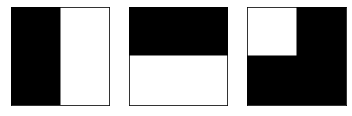

In [3]:
# Ploting the arrays to get the images
fig, axs = plt.subplots(1,3)
axs[0].imshow(I1, cmap='gray')
axs[1].imshow(I2, cmap='gray')
axs[2].imshow(I3, cmap='gray')
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

*   Use the above three images to create the following image

![color_patches.png](https://drive.google.com/uc?export=view&id=1UxmFHToC4TUjgtB7UQMbB3DM3RIZlgBZ)

*Hint: Remember channels and color spaces*

([], <a list of 0 Text major ticklabel objects>)

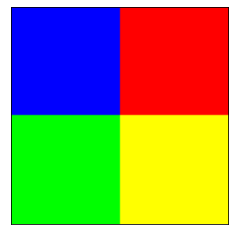

In [4]:
# solution
# The 2D images we just created work as a single channel in a 3D RGB image,
# also the values we set on the 2D images have the correct positioning that
# when we stack them we get a 3D RGB image that has the same colors as the
# square of the example
IC = np.moveaxis(np.array([I1,I2,I3]),0,-1)
plt.imshow(IC)
plt.xticks([])
plt.yticks([])

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![sillas.jpg](https://drive.google.com/uc?export=view&id=1Ged9FdDWIcipbNxNatGgCZyRdQvcGtoG)

*   Extract individual channels and plot them using matplotlib subplot.



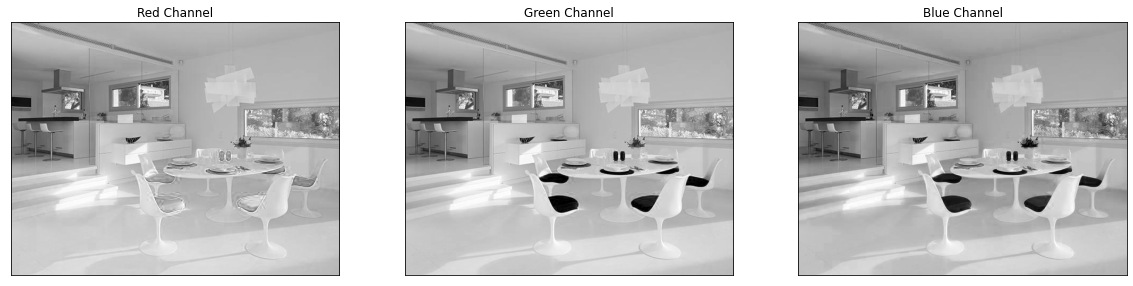

In [5]:
# solution

# read in the image and create arrays for each color channel
sillas = plt.imread('images/sillas.jpg')
r = sillas[:,:,0]
g = sillas[:,:,1]
b = sillas[:,:,2]

# plot each color channel
fig, axs = plt.subplots(1,3, figsize=(20,20))
axs[0].imshow(r, cmap = 'gray',)
axs[0].set_title('Red Channel')
axs[1].imshow(g, cmap = 'gray')
axs[1].set_title('Green Channel')
axs[2].imshow(b, cmap = 'gray')
axs[2].set_title('Blue Channel')
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

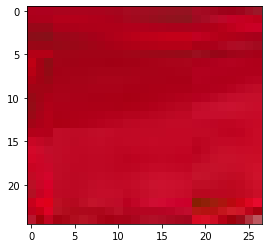

In [6]:
# solution

# Cropt to a red part in the image to extraxt useful information to set tresholds 
# in order to turn red objects into blue
plt.imshow(sillas[330:355, 285:312,:])

In [7]:
# Setting extracting minimum and maximun value of the red part to use it as tresholds
rmin = sillas[330:355, 285:312,:][:,:,0].min()-40
rmax = sillas[330:355, 285:312,:][:,:,0].max()+39
gmin = sillas[330:355, 285:312,:][:,:,1].min()
gmax = sillas[330:355, 285:312,:][:,:,1].max()+10
bmin = sillas[330:355, 285:312,:][:,:,2].min()-10
bmax = sillas[330:355, 285:312,:][:,:,2].max()+50

rmin,rmax,gmin,gmax,bmin,bmax

(95, 270, 0, 97, -8, 145)

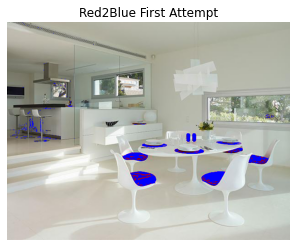

In [8]:
# Implementing conditionals to detect red objects ans at the same time change their color 
# Here we used an superior and inferior threshold method
newr = np.where((rmin < r) & (r< rmax) & (gmin < g) & (g< gmax) & (bmin < b) & (b< bmax), r*0, r)
newg = np.where((rmin < r) & (r< rmax) & (gmin < g) & (g< gmax) & (bmin < b) & (b< bmax), g*0, g)
newb = np.where((rmin < r) & (r< rmax) & (gmin < g) & (g< gmax) & (bmin < b) & (b< bmax), 255, b)

newimg = np.moveaxis(np.array([newr,newg,newb]),0,-1)

plt.imshow(newimg)
plt.axis('off')
_ = plt.title('Red2Blue First Attempt')

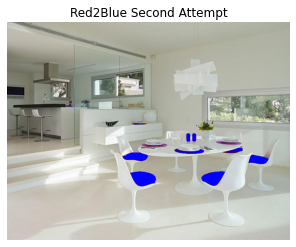

In [9]:
# Using a 1 treshold metod to detect and change color ob red objetc
newr = np.where((r > 100) & (g < 90) & (b < 90), r*0, r)
newg = np.where((r > 100) & (g < 90) & (b < 90), g*0, g)
newb = np.where((r > 100) & (g < 90) & (b < 90), 255, b)

newimg = np.moveaxis(np.array([newr,newg,newb]),0,-1)

plt.imshow(newimg)
plt.axis('off')
_ = plt.title('Red2Blue Second Attempt')

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![model_and_coat.png](https://drive.google.com/uc?export=view&id=1DOieJOrfwe34z0-3EEBVyX1Ac45sb5SN)


In [10]:
# Loading the necessary images
Model = plt.imread('images/model.png')
Coat = plt.imread('images/coat.png')
Texture = plt.imread('images/texture2.png')

Model.shape, Coat.shape, Texture.shape

((1188, 915, 4), (1188, 915, 4), (1188, 915, 3))

In [11]:
# Separating images by channel to modify them
rC = Coat[:,:,0]
gC = Coat[:,:,1]
bC = Coat[:,:,2]

rM = Model[:,:,0]
gM = Model[:,:,1]
bM = Model[:,:,2]

rT = Texture[:,:,0]
gT = Texture[:,:,1]
bT = Texture[:,:,2]

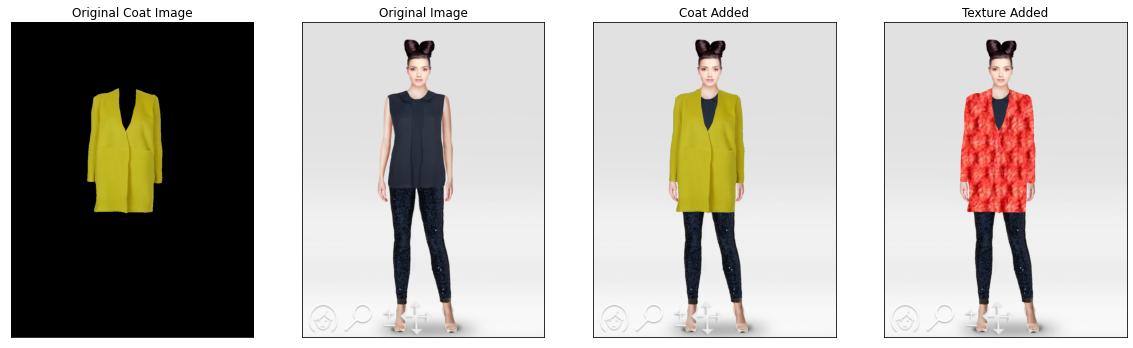

In [12]:
#Coat
# Implementing conditions to get the area of the coat, preserve the foregroud 
# and change the background with the model's image one.
newr = np.where((rC != 0) & (gC != 0) & (bC != 0), rC, rM)
newg = np.where((rC != 0) & (gC != 0) & (bC != 0), gC, gM)
newb = np.where((rC != 0) & (gC != 0) & (bC != 0), bC, bM)

model_with_coat = np.moveaxis(np.array([newr,newg,newb]),0,-1)

#Texture
# Implementing conditions to put the texture in the coat sheap, also
# using the model's image background.
newr = np.where((rC != 0) & (gC != 0) & (bC != 0), rT, rM)
newg = np.where((rC != 0) & (gC != 0) & (bC != 0), gT, gM)
newb = np.where((rC != 0) & (gC != 0) & (bC != 0), bT, bM)

coat_texture1 = np.moveaxis(np.array([newr,newg,newb]),0,-1)

fig, axs = plt.subplots(1,4, figsize=(20,20))
axs[0].imshow(Coat)
axs[0].set_title('Original Coat Image')
axs[1].imshow(Model)
axs[1].set_title('Original Image')
axs[2].imshow(model_with_coat)
axs[2].set_title('Coat Added')
axs[3].imshow(coat_texture1)
axs[3].set_title('Texture Added')

fig.patch.set_alpha(0.2)
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




/usr/local/lib/python3.7/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


Text(0, 0.5, 'Count of Pixels')

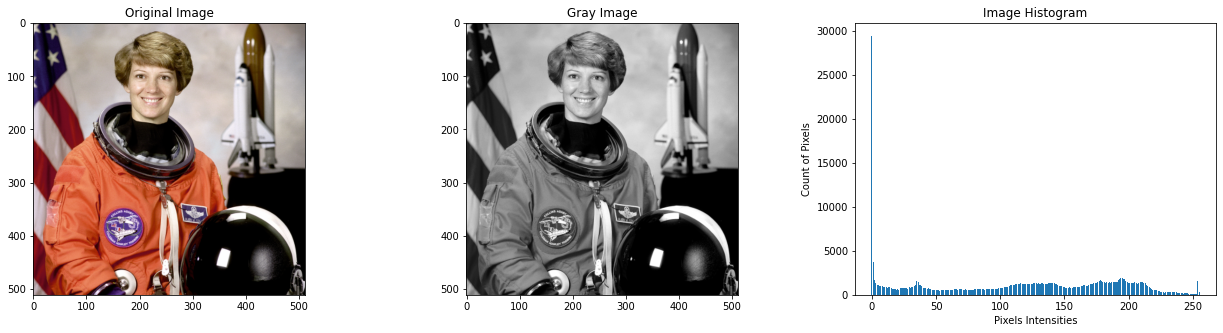

In [13]:
#solution
import matplotlib
import skimage.exposure as ske
from skimage.color import rgb2gray

# import astronaut image and convert to grayscale
astronaut = data.astronaut()
astronaut_gray = rgb2gray(astronaut)

# plot original image, grayscale image, and histogram of grayscale image
fig, axs = plt.subplots(1,3, figsize = (22,5))
axs[0].imshow(astronaut)
axs[0].set_title('Original Image')
axs[1].imshow(astronaut_gray, cmap='gray')
axs[1].set_title('Gray Image')
axs[2].bar(list(range(256)),ske.histogram(astronaut_gray)[0])
axs[2].set_title('Image Histogram')
axs[2].set_xlabel('Pixels Intensities')
axs[2].set_ylabel('Count of Pixels')

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

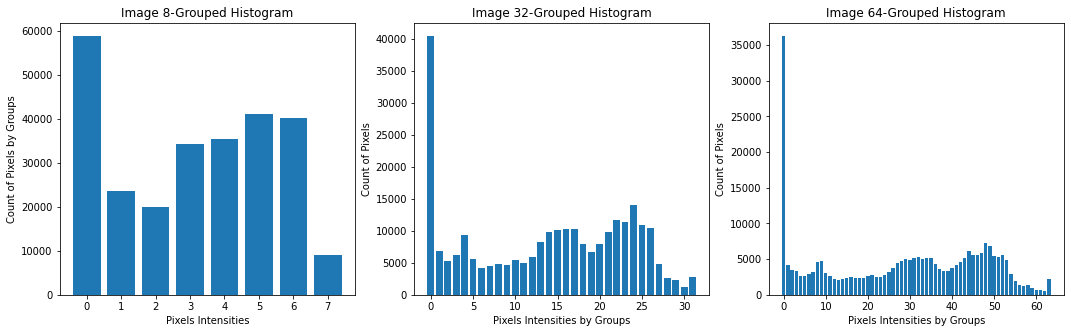

In [14]:
# solution

# plot histograms of greyscale image with different numbers of bins to demonstrate differences in interpretation between histograms with a lower number of bins and histograms with a higher number of bins
fig, axs = plt.subplots(1,3, figsize = (18,5))

# first plot with 8 bins
axs[0].bar(list(range(8)),ske.histogram(astronaut_gray, 8)[0])
axs[0].set_title('Image 8-Grouped Histogram')
axs[0].set_xlabel('Pixels Intensities')
axs[0].set_ylabel('Count of Pixels by Groups')

# second plot with 32 bins
axs[1].bar(list(range(32)),ske.histogram(astronaut_gray, 32)[0])
axs[1].set_title('Image 32-Grouped Histogram')
axs[1].set_xlabel('Pixels Intensities by Groups')
axs[1].set_ylabel('Count of Pixels')

# third plot with 64 bins
axs[2].bar(list(range(64)),ske.histogram(astronaut_gray, 64)[0])
axs[2].set_title('Image 64-Grouped Histogram')
axs[2].set_xlabel('Pixels Intensities by Groups')
_ = axs[2].set_ylabel('Count of Pixels')




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*When the bin count is lowered, each bucket has a larger number of values, since it is representing a larger range of pixel intensities. Bin count does impact inference. For example, if there is a lower number of bins, you have less specific information about the image. In our first histogram, with 256 bins, it is clear that there is a large number of pure black pixels. However, in the 8-bin histogram, we see that there are a large number of dark pixels (ie pixels in the first bucket), but we do not know that these pixels are pure black. Additionally, in the 8-bin histogram, it appears that there are almost as many pixels of moderate intensity as there are of dark intensity, whereas, in reality, there is a higher contrast between dark pixels and lighter ones as according to the more detailed 256-bin histogram. As the number of bins is increased from 8 to 32 and to 64, as shown above, though the general distribution does not change, increasingly more detail is given about the overall pixel intensities. Therefore, to garner the most detailed knowledge about the pixel intensities in an image, the ideal bin count is 256, so that the whole range of pixel intensities is represented.*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


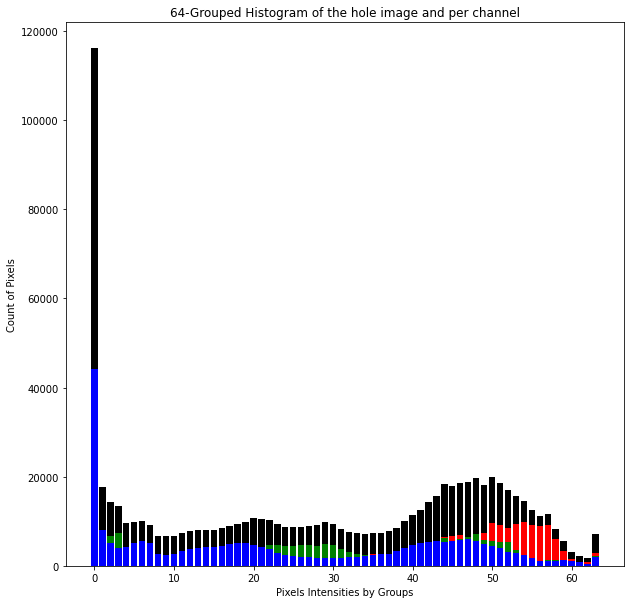

In [15]:
# solution
# We used a gouped version of the histogram as it is useful to get a general view of the image pixel distribution information. 
# We get the histogram of the whole color astronaut image and then got an histogram for each of the individual channels. 
fig = plt.figure(figsize=(10,10))
plt.bar(list(range(64)),sum(ske.histogram(astronaut.astype('float'),64, channel_axis=2)[0]), color = 'black')
plt.bar(list(range(64)),ske.histogram(astronaut[:,:,0].astype('float'),64)[0], color = 'red')
plt.bar(list(range(64)),ske.histogram(astronaut[:,:,1].astype('float'),64)[0], color = 'green')
plt.bar(list(range(64)),ske.histogram(astronaut[:,:,2].astype('float'),64)[0], color = 'blue')
plt.title('64-Grouped Histogram of the hole image and per channel')
plt.xlabel('Pixels Intensities by Groups')
_ = plt.ylabel('Count of Pixels')

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



/usr/local/lib/python3.7/dist-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


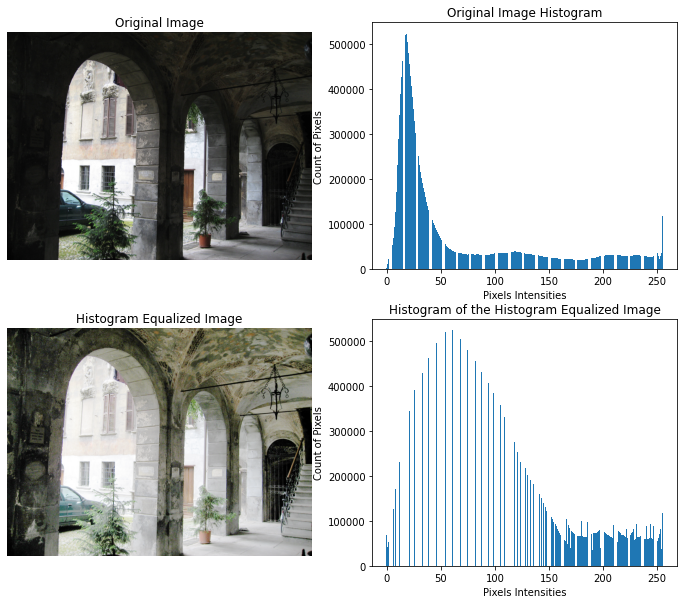

In [16]:
# read in the image and generate the equalized histogram values using skimage.exposure.equalize_hist
aqua = plt.imread('images/aquatermi_lowcontrast.jpg')
aqua_eq = ske.equalize_hist(aqua, nbins=64)

# generate plots
fig, axs = plt.subplots(2,2, figsize=(12,10))

# display original image 
axs[0,0].imshow(aqua)
axs[0,0].set_title('Original Image')
axs[0,0].axis('off')

# display histogram of the original image
axs[0,1].bar(list(range(256)),ske.histogram(aqua.astype('float'))[0])
axs[0,1].set_title('Original Image Histogram')
axs[0,1].set_xlabel('Pixels Intensities')
axs[0,1].set_ylabel('Count of Pixels')

# display the equalized image
axs[1,0].imshow(aqua_eq)
axs[1,0].set_title('Histogram Equalized Image')
axs[1,0].axis('off')

# display the histogram of the equalized image
axs[1,1].bar(list(range(256)),ske.histogram(aqua_eq.astype('float'))[0])
axs[1,1].set_title('Histogram of the Histogram Equalized Image')
axs[1,1].set_xlabel('Pixels Intensities')
_ = axs[1,1].set_ylabel('Count of Pixels')


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*While cdf and interpolation will space out the values more when the histogram bucket has a higher value, linear contrast stretch will stretch the values evenly across the entire spectrum of intensities. So usually cdf and interpolation techniques would be useful when we have a high contrast image, while contrast strech would improve the quality of low contrast images.*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



In [17]:
# solution
# We read the image to be processed, and then we define a fuction
# that express Linear Contrast Stretch operation to modify the image contrast
# we use some statistics of the image to define the parameters used in the operation
image = plt.imread('images/original.jpg')

def LCS(img,bins):
    img_c = img.copy()
    i_max = img_c.max()
    i_min = img_c.min()
    img_c = ((img_c-i_min)/(i_max-i_min))*bins
    return img_c


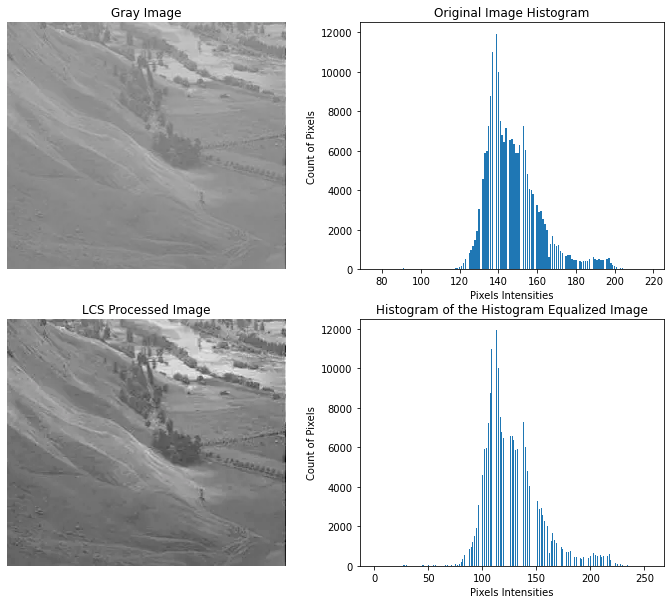

In [18]:
# We apply Linear Contrast Stretch algorithm to the image the we plot bot images
# with their respective histogram
image_LCS = LCS(image, 255)

fig, axs = plt.subplots(2,2, figsize=(12,10))
axs[0,0].imshow(image, cmap='gray')
axs[0,0].set_title('Gray Image')
axs[0,0].axis('off')
axs[0,1].bar(list(range(int(image.min()),int(image.max()+1))),ske.histogram(image)[0])
axs[0,1].set_title('Original Image Histogram')
axs[0,1].set_xlabel('Pixels Intensities')
axs[0,1].set_ylabel('Count of Pixels')
axs[1,0].imshow(image_LCS.astype('uint8'), cmap='gray')
axs[1,0].set_title('LCS Processed Image')
axs[1,0].axis('off')
axs[1,1].bar(list(range(256)),ske.histogram(image_LCS)[0])
axs[1,1].set_title('Histogram of the Histogram Equalized Image')
axs[1,1].set_xlabel('Pixels Intensities')
_ = axs[1,1].set_ylabel('Count of Pixels')

In [19]:
# looking at the max and min values of the original and modified versions of the images s
image.min(),'--', image.max(), '    ', image_LCS.min(),'--', image_LCS.max()

(76, '--', 218, '    ', 0.0, '--', 255.0)

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




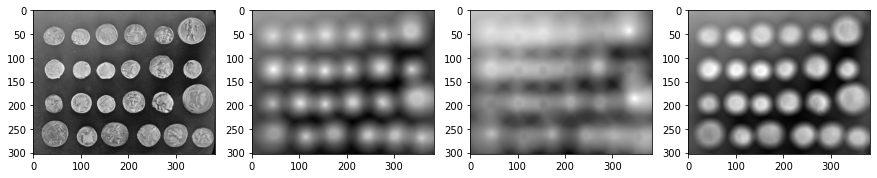

In [20]:
# solution

# read in image and generate disk selems of radius 20, 30, and 10, respectively
coins = data.coins()
disk_selem = skimage.morphology.disk(20)
disk_selem_30 = skimage.morphology.disk(30)
disk_selem_10 = skimage.morphology.disk(10)

# display original image, then images filtered with disk selems of radius 20, 30, and 10, respectively
fig, axs = plt.subplots(1,4, figsize=(15,15))
axs[0].imshow(coins, cmap='gray')
axs[1].imshow(skimage.filters.rank.mean(coins, disk_selem), cmap='gray')
axs[2].imshow(skimage.filters.rank.mean(coins, disk_selem_30), cmap='gray')
_=axs[3].imshow(skimage.filters.rank.mean(coins, disk_selem_10), cmap='gray')

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

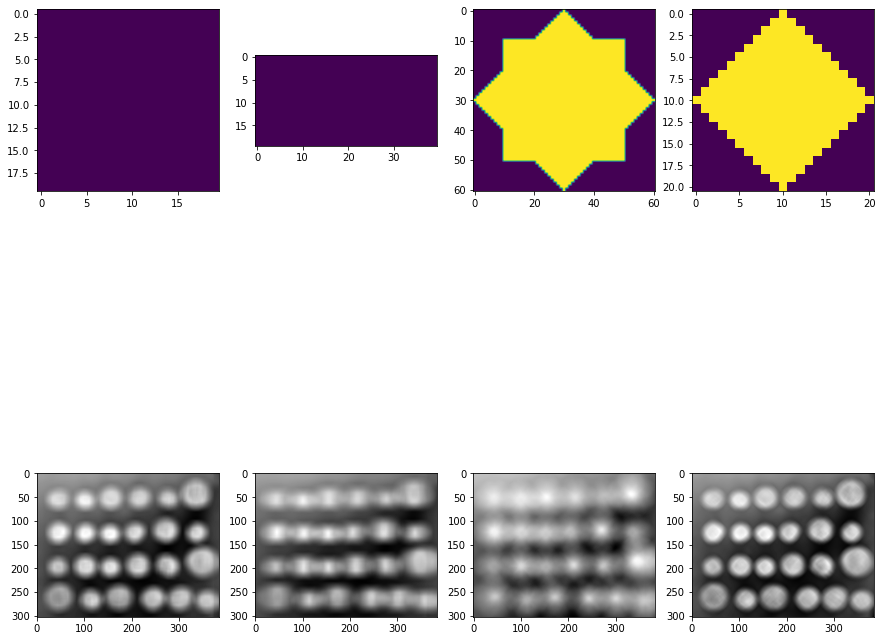

In [21]:
# solution

# generate selems of varying shapes (square, rectangle, star, and diamond, respectively)
# dimensions were chosen to best show the unique effect of each selem shape
square_selem = skimage.morphology.square(20)
rectangle_selem = skimage.morphology.rectangle(20,40)
star_selem = skimage.morphology.star(20)
diamond_selem = skimage.morphology.diamond(10)

# plot each selem and its effect as a filter on the image
fig, axs = plt.subplots(2,4, figsize=(15,15))
_=axs[0,0].imshow(square_selem)
_=axs[1,0].imshow(skimage.filters.rank.mean(coins, square_selem), cmap='gray')
_=axs[0,1].imshow(rectangle_selem)
_=axs[1,1].imshow(skimage.filters.rank.mean(coins, rectangle_selem), cmap='gray')
_=axs[0,2].imshow(star_selem)
_=axs[1,2].imshow(skimage.filters.rank.mean(coins, star_selem), cmap='gray')
_=axs[0,3].imshow(diamond_selem)
_=axs[1,3].imshow(skimage.filters.rank.mean(coins, diamond_selem), cmap='gray')


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*A greater radius has a greater smoothing effect, while a smaller radius has a lesser smoothing effect.*

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*The structuring element will smooth the image according to its own shape. For example, a horizontal rectangle smooths in a horizontal direction, etc.*



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

Mean filtering takes the average of all neighboring pixels and applies this average to all pixels in the neighborhood. Gaussian filtering doesn't weight all the neighboring pixels evenly, and instead gives higher weights to closer neighboring pixels, and lower weights to those that are farther away.
 
Due to these differences in the way each filter applies weights, Gaussian filters are a better choice than mean filters if the user's goal is to preserve any edges in the image and/or to have a more gentle smoothing effect. Mean filters, on the other hand, will produce a rougher, more pixelated-looking result (see image*). Where mean filters excel, however, is that they run much faster than Gaussian filters, since they don't use convolution. Therefore, if a user's priority is speed rather than a smoother image, a mean filter is a better option.  



---
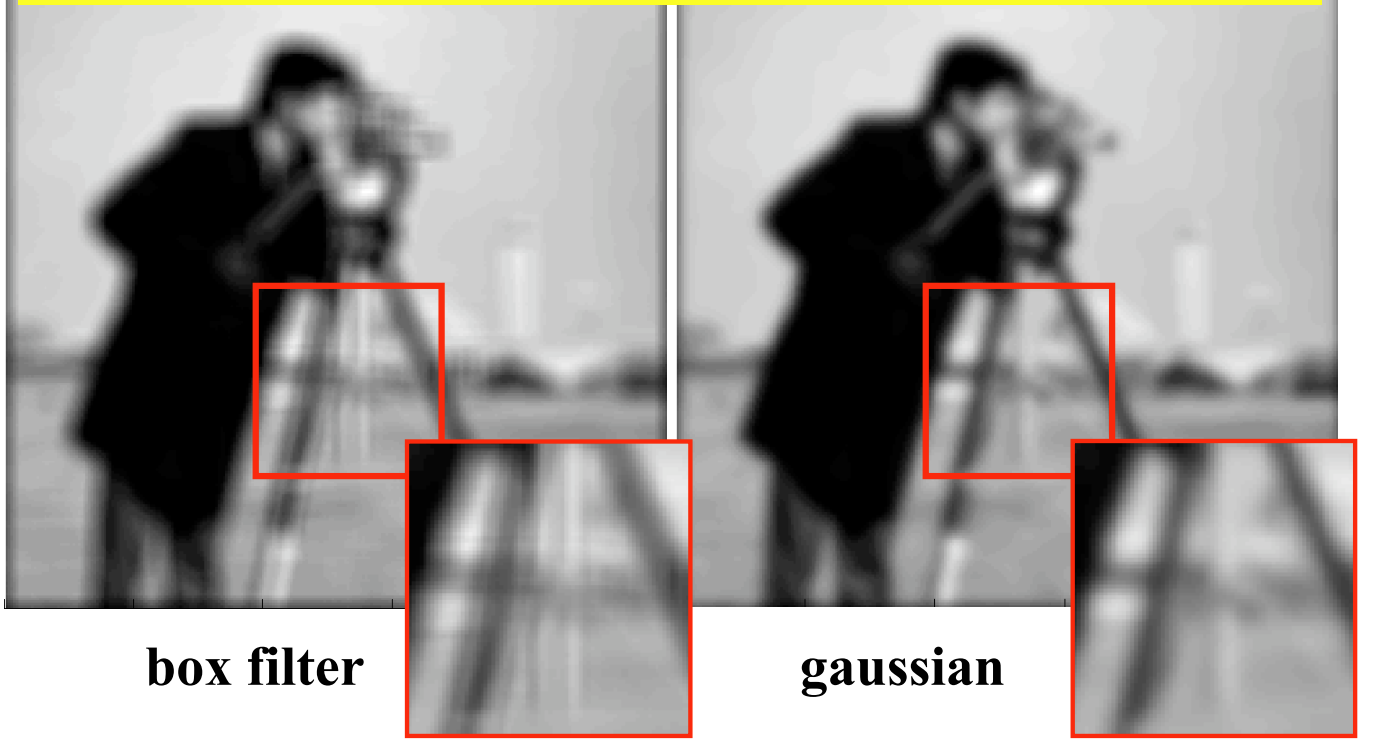

Image taken from: [Robert Collins, CSE486, Penn State](https://www.cse.psu.edu/~rtc12/CSE486/lecture04.pdf) 
---






---

## **End of P2: Image operators and filters**

Deadline for P2 submission in CampusVirtual is: **Thursday, the 6th of October, 2022**
